In [ ]:
!pip install minisom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


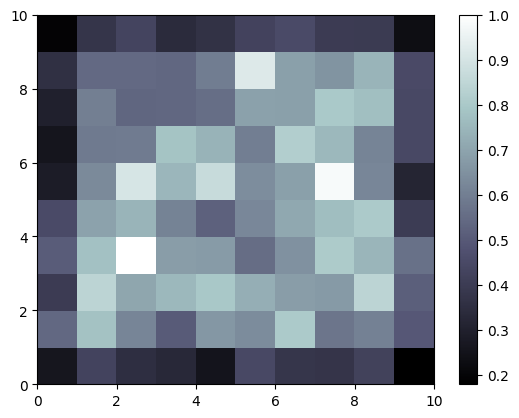

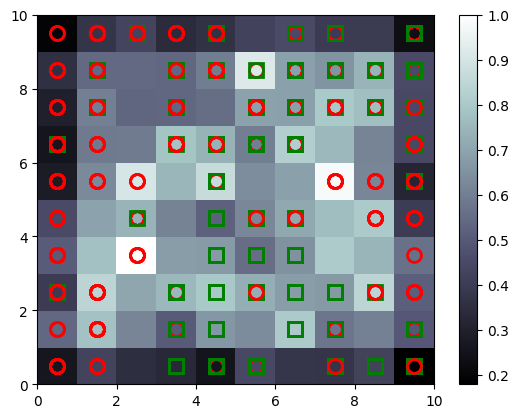

In [ ]:

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

# Loading Data
data = pd.read_csv('/content/Credit_Card_Applications.csv')

# X
data

# Shape of the data:
data.shape

# Info of the data:
data.info()

# Defining X variables for the input of SOM
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

# X variables:
pd.DataFrame(X)

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)

# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)


# Returns the distance map from the weights:
som.distance_map()

from pylab import plot, axis, show, pcolor, colorbar, bone

bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend
markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']

for i, x in enumerate(X):

    w = som.winner(x)

    plot(w[0] + 0.5,

         w[1] + 0.5,

         markers[y[i]],

         markeredgecolor = colors[y[i]],

         markerfacecolor = 'None',

         markersize = 10,

         markeredgewidth = 2)

show()


In [ ]:
mappings = som.win_map(X)
mappings

mappings.keys()
len(mappings.keys())

mappings[(7,7)]
frauds = np.concatenate((mappings[(7,7)], mappings[(8,5)], mappings[(8,7)]), axis = 0)
frauds

# the list of customers who are frauds:
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,18.42,10.415,1.0,6.0,4.0,0.125,1.0,0.0,0.0,0.0,2.0,120.0
1,1.0,62.50,12.750,1.0,8.0,8.0,5.000,1.0,0.0,0.0,0.0,2.0,112.0
2,1.0,31.57,5.000,1.0,6.0,4.0,8.500,1.0,0.0,0.0,0.0,2.0,0.0
3,1.0,44.25,11.000,1.0,2.0,4.0,1.500,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,23.00,0.625,1.0,6.0,4.0,0.125,1.0,0.0,0.0,0.0,2.0,180.0
5,1.0,20.50,10.000,1.0,8.0,4.0,2.500,1.0,0.0,0.0,0.0,1.0,40.0
6,1.0,25.67,2.210,1.0,6.0,4.0,4.000,1.0,0.0,0.0,0.0,2.0,188.0
7,1.0,35.25,16.500,1.0,8.0,4.0,4.000,1.0,0.0,0.0,0.0,2.0,80.0
8,0.0,40.83,3.500,2.0,3.0,5.0,0.500,0.0,0.0,0.0,0.0,1.0,1160.0
9,0.0,18.58,10.000,2.0,2.0,4.0,0.415,0.0,0.0,0.0,0.0,2.0,80.0


Kohonen maps, also known as Self-Organizing Maps (SOM), have several disadvantages despite their usefulness in certain tasks like clustering and dimensionality reduction. Here are some key drawbacks:

Interpretability: The resulting map can be hard to interpret, especially with high-dimensional data. There’s no straightforward way to explain why certain data points are close or far apart.

Training Complexity: Training SOMs can be slow for large datasets due to the unsupervised learning process, which may require several iterations to converge.

Parameter Sensitivity: The performance of Kohonen maps is highly sensitive to the choice of parameters like the learning rate, neighborhood size, and map size, which can be difficult to optimize.

Local Minima: SOMs can get stuck in local minima during training, resulting in suboptimal representations of the input data.

No Probabilistic Model: Unlike other methods like Gaussian Mixture Models, SOMs do not provide a probabilistic framework, which limits their use in scenarios where uncertainty or confidence levels are important.

Fixed Grid Structure: SOMs use a fixed grid structure, which might not always adapt well to the underlying data distribution, leading to inefficient use of map space or overfitting in some regions.